# Домашняя работа №1

### Работу выполнила: **Харчевникова Ангелина 18 МАГ ИАД**

**Набор данных:** Bank Marketing Dataset  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing# 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001  

Датасет получен в результате проведения маркетинговой кампании, направленной на привлечение клиентов к созданию банковских вкладов. Всего в опросе участвовало ~40 тыс. человек. Для каждого опрошенного клиента известна информация по наличию открытого банковского вклада. Также на основе полученных данных было проведено исследование по прогнозированию успеха маркетинговых кампаний.  

**Цель исследования:** создание модели для прогнозирования результата телефонного звонка, направленного на предложение долгосрочного банковского депозита. 
Данное решение поможет менеджерам приоритезировать клиентов при осуществлении звонка, что впоследствии приведет к сокращению времени и стоимости подобных маркетинговых кампаний. Более того, решение приведет к уменьшению навязчивости звонков для банковских клиентов, а также повышению эффективности маркетинговой кампании.  

### Данных характеризуются следующими признаками.

### Bank clients data
 
  
  **Input variables:**
  - age (numeric) - Client age
  - job (categorical) - Type of job: "admin", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self- employed", "services", "student", "technician", "unemployed", "unknown"
  - marital (categorical) - Marital status: "divorced", "married", "single", "unknown"
  - education (categorical) - Education level: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", university.degree", "unknown"
  - default (categorical) - Has credit in default: "no", "yes", "unknown"
  - housing (categorical) - Has housing loan: "no", "yes", "unknown"
  - loan (categorical) - Has personal loan: "no", "yes", "unknown"
 
 **Related with the last contact of the current campaign:***
  - contact (categorical) - Contact communication type: "cellular", "telephone" 
  - month (categorical) - Last contact month of year: "jan", "feb", "mar", ..., "nov", "dec"
  - day_of_week (categorical) - Last contact day of the week: "mon", "tue", "wed", "thu", "fri"
  - duration (numeric) - Last  contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
 
 **Other attributes:**
  - campaign (numeric) - Number of contacts performed during this campaign and for this client
  - pdays (numeric) - Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
  - previous (numeric) - Number of contacts performed before this campaign and for this client 
  - poutcome (categorical) - Outcome of the previous marketing campaign: "failure", "nonexistent", "success"
 
 **Social and economic context attributes**
  - emp.var.rate (numeric) - Employment variation rate 
  - cons.price.idx (numeric) - Consumer price index   
  - cons.conf.idx (numeric) - Consumer confidence index 
  - euribor3m (numeric) - Euribor 3 month rate
  - nr.employed (numeric) - Number of employees

  **Output variable (desired target):**
  - y (binary) - Has the client subscribed a term deposit? "yes", "no"

## Обработка данных

In [46]:
# Импортируем необходимые модули
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [47]:
# Считываем данные из файла в DataFrame
data = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')
data_const=data
type(data)

pandas.core.frame.DataFrame

In [48]:
# Получим первые default=5 строк
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
# Получим последние default=5 строк
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Размерность 
print(data.shape)
print(data.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [6]:
# Существуют различные способы по выводу и отображению данных
# Например, можно получить первые 10 строк для признака (столбца) 'job'
data['job'][0:10]

0      housemaid
1       services
2       services
3         admin.
4       services
5       services
6         admin.
7    blue-collar
8     technician
9       services
Name: job, dtype: object

In [7]:
data.at[2, 'marital']

'married'

In [8]:
data['day_of_week'].head()

0    mon
1    mon
2    mon
3    mon
4    mon
Name: day_of_week, dtype: object

In [20]:
data[['day_of_week','month']].tail()

,day_of_week,month
41183,fri,nov
41184,fri,nov
41185,fri,nov
41186,fri,nov
41187,fri,nov


In [21]:
# Описательная статистика для числовых значений
# Здесь можно узнать о количестве данных по каждому из признаков, узнать медиану, среднее квадратическое отклонение,
# минимальное/максимальное значение, процентили
# Процентиль - значение, ниже которого выпадает определенный процент наблюдений  
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


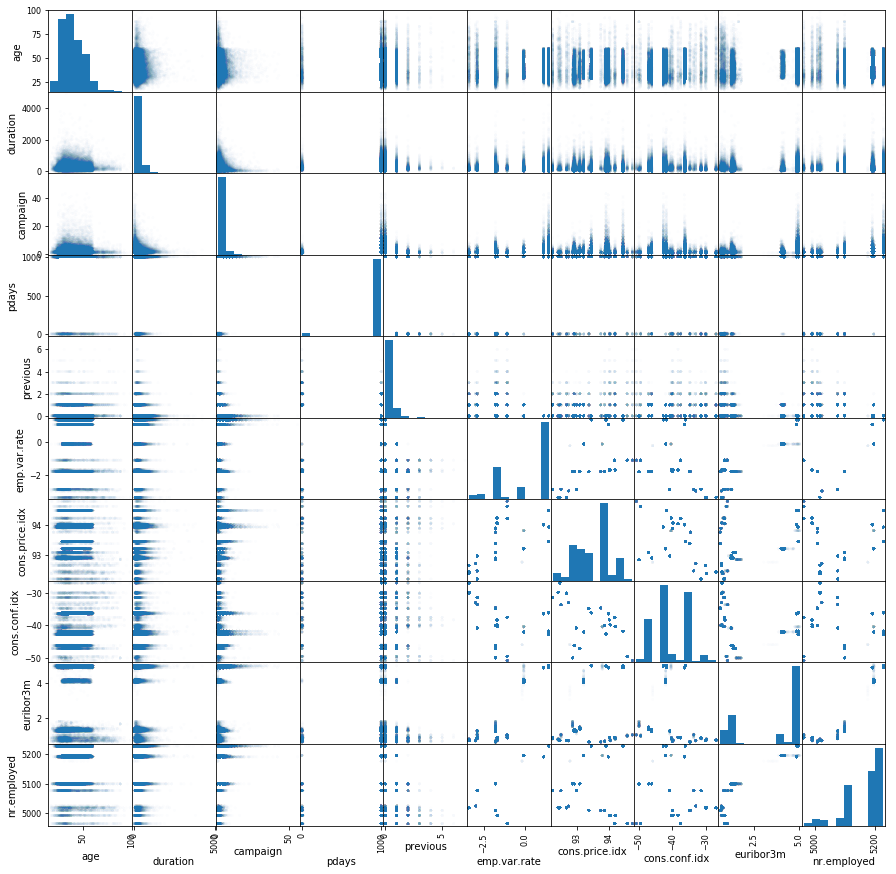

In [22]:
# Рассмотрим матрицу рассеяния, которая показывает, коррелируют ли признаки между собой
# Построим матрицу для каждой пары признаков
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

In [23]:
# Рассмотрим корреляцию признаков в числовых значениях
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


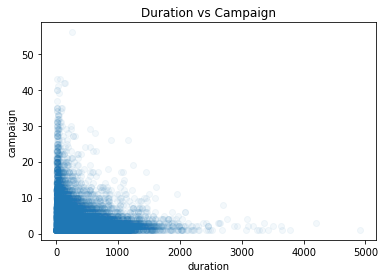

In [24]:
# Зависимости можно рассматривать для отдельных пар признаков
# Рассмотрим зависимость количества звонков для данного клиента и длительности телефонного опроса 
# Согласно предыдущей таблице корреляция отрицательна, то есть возрастание одного значения ведет к снижению другого
# В данном случае, чем больше осуществлялось звонков для клиета, тем продолжительность разговора становилась короче

plt.plot(data['duration'], data['campaign'], 'o', alpha = 0.05)
plt.xlabel('duration')
plt.ylabel('campaign')
plt.title('Duration vs Campaign')
pass

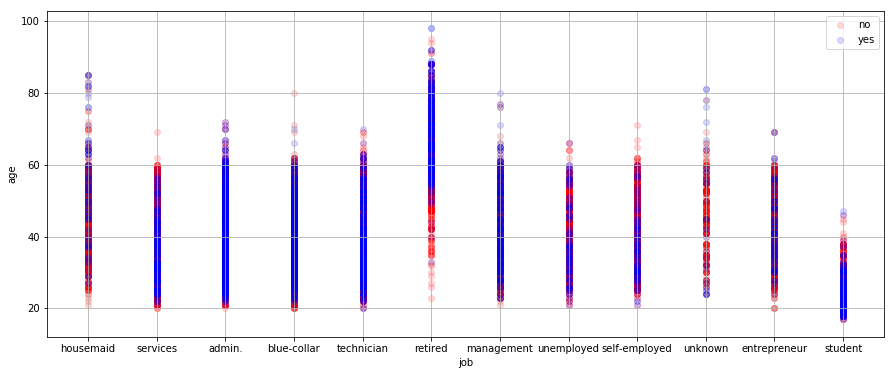

In [14]:
# Рассмотрим количество оформивших и неоформивших банковский депозит клиентов, разбитых по возрасту и их профессии
plt.figure(figsize = (15, 6))
plt.scatter(data[data['y'] == 'no']['job'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')
plt.scatter(data[data['y'] == 'yes']['job'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')
plt.xlabel('job')
plt.ylabel('age')
plt.legend()
plt.grid()

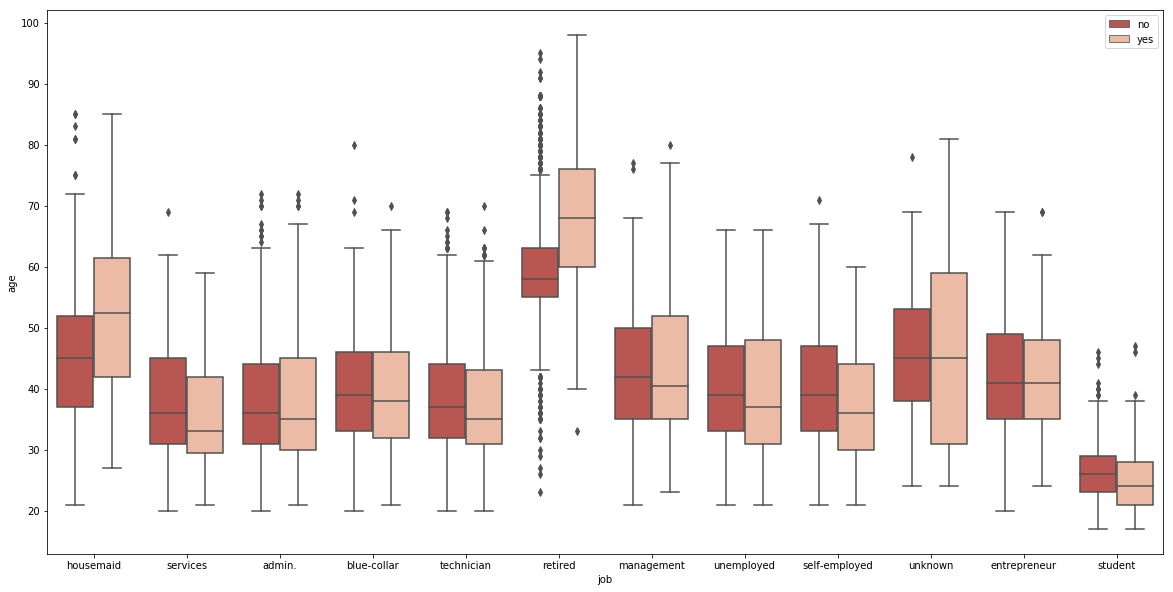

In [9]:
# data.boxplot(by='y', column=['age'], grid=False)

import seaborn as sns
plt.figure(figsize = (20, 10))
sns.boxplot(x="job", hue="y", y="age", data=data.reset_index(), palette=sns.color_palette("RdBu", n_colors=5))
plt.legend()

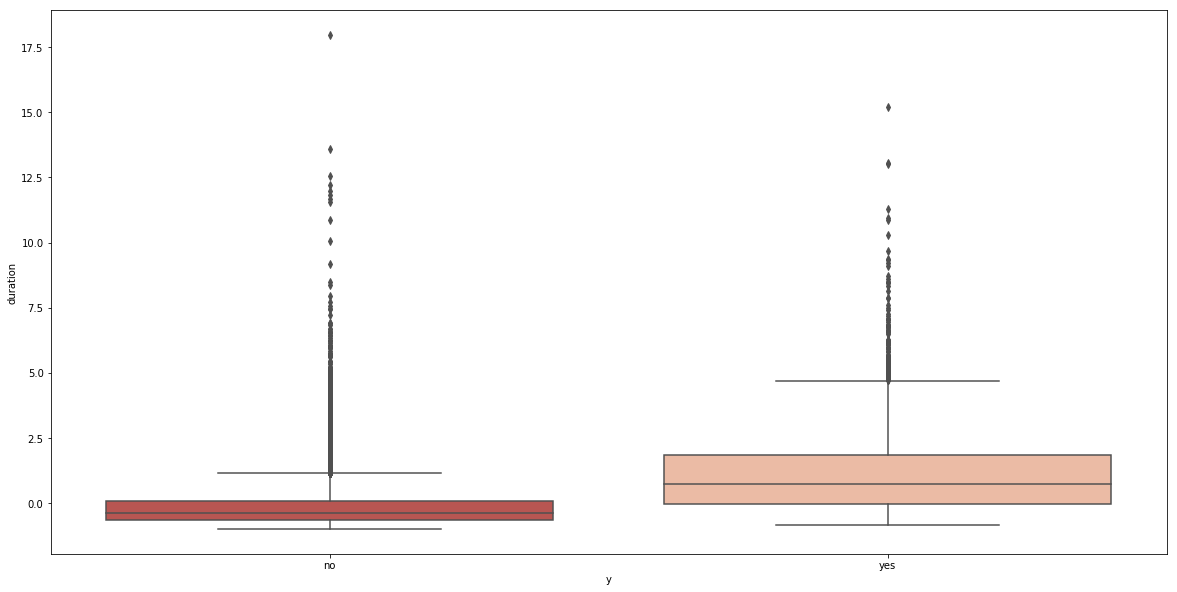

In [32]:
# Стоит заметить, что продолжительность разговора имеет влияние на окончательное решение

import seaborn as sns
plt.figure(figsize = (20, 10))
sns.boxplot(x="y", y="duration", data=data.reset_index(), palette=sns.color_palette("RdBu", n_colors=5))


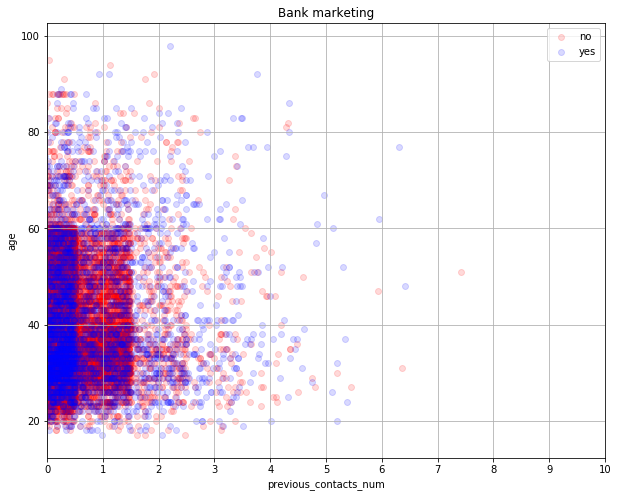

In [15]:
# Добавляем рандомные значения для визуализации
np.random.seed(0)
previous_contacts_num_rnd = data['previous'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(previous_contacts_num_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.scatter(previous_contacts_num_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.xlabel('previous_contacts_num')
plt.xticks(range(11))
plt.xlim(0, 10)
plt.ylabel('age')
plt.title('Bank marketing')
plt.legend()
plt.grid()

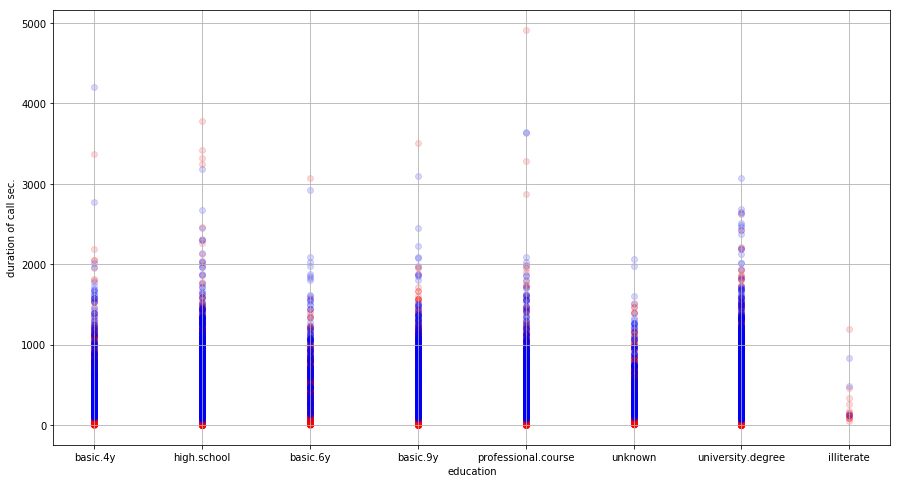

In [16]:
# Зависимость оформления депозита от уровня образования и продолжительности разговора
plt.figure(figsize = (15, 8))

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['duration'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['duration'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.xlabel('education')
plt.ylabel('duration of call sec.')
plt.grid()

In [17]:
# Мы также можем получить описательная статистика для категориальных признаков
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [18]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

## Задача

Проведем эксперименты с разными наборами признаков в решающей модели  
Duration (продолжительность телефонного разговора) наиболее влияет на полученный результат. К примеру, если Duration = 0, то очевидно, клиент не оформит депозит, так как изначально откажется от предлагаемой информации  

Также в датасете присутствуют признаки, которые на первый взгляд менее информативны  
Например, можно попробовать не рассматривать месяц и день недели, в которые был осуществлен звонок 
Сначала проведем эксперименты со всеми признаками

In [19]:
# dropped_features = ('duration',)
# dropped_features = ('month', 'day_of_week', 'euribor3m', 'nr.employed', 'cons.price.idx')
# 
# for feature in dropped_features:
#     data = data.drop(feature, axis = 1)

## Подготовка данных

In [50]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [51]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


## Обработка пропущенных значений

Одной из проблем набора реальных данных является присутствие некоторого количества пропущенных, нулевых значений. Это обусловлено тем, что при проведении телефонного опроса не всегда клиент готов предоставлять полную информацию о себе

**Решение 1** Удалить пропущенные значения. Тогда данных может стать слишком мало для построения хорошей модели

**Решение 2** Одной из часто применяемых практик является замена пропущенных величин средним или медианным значением. Данный способ и будет применяться при решении поставленной задачи

In [52]:
data.median(axis = 0)

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

In [53]:
# Заполняем значения 'NA/NaN' медианным значением
data = data.fillna(data.median(axis = 0), axis = 0)

In [14]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
data[numerical_columns].count(axis = 0)

age               41188
duration          41188
campaign          41188
pdays             41188
previous          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
dtype: int64

In [55]:
# Для категориальных данных присутствует значение 'unknown' 
# Произведем замену'unknown' = nan
data = data.replace('unknown', np.nan)

In [56]:
data[categorical_columns].count(axis = 0)

job            40858
marital        41108
education      39457
default        32591
housing        40198
loan           40198
contact        41188
month          41188
day_of_week    41188
poutcome       41188
y              41188
dtype: int64

In [57]:
# Заполняем категориальные признаки медианным значением (для тех, где < 41188)
data['job'] = data['job'].fillna('admin.')

In [58]:
col = ('marital', 'education', 'default', 'housing', 'loan')
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [59]:
data[categorical_columns].count(axis = 0)

job            41188
marital        41188
education      41188
default        41188
housing        41188
loan           41188
contact        41188
month          41188
day_of_week    41188
poutcome       41188
y              41188
dtype: int64

## Векторизация

In [60]:
# Для категориальных признаков требуется провести процедуру векторизации, где наличие признака представляется в виде вектора
# с 1 в соответствующей этому признаку позиции
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['default', 'housing', 'loan', 'contact', 'y'] ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']


In [61]:
# Все категориальные значения (с двумя ответами) заменяем на бинарные
for b_coll in binary_columns[0:len(binary_columns)-1]:
    u_data = data[b_coll].unique()
    data.at[data[b_coll] == u_data[0], b_coll] = 0
    data.at[data[b_coll] == u_data[1], b_coll] = 1

In [62]:
data.housing.describe()

count    41188.000000
mean         0.547878
std          0.497708
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: housing, dtype: float64

### Применяем метод Векторизации для небинарных признаков

In [63]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [64]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


## Нормализация количественных признаков

In [65]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [66]:
# Так как многие алгоритмы (в том числе метод ближайших соседей) чувствительны к масштабированию данных
# Поэтому, необходимо нормализовать данные
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533016,0.010471,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
1,1.628973,-0.421495,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
2,-0.290182,-0.124518,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
3,-0.002309,-0.413782,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
4,1.533016,0.187886,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676


In [67]:
data_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.009196e-16,-3.795266e-18,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01


## Объединение в одну таблицу

In [68]:
# Все полученные матрицы собираем в одну 
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(41188, 54)


In [69]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default,housing,loan,contact
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.009196e-16,-3.795266e-18,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11,...,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.000073,0.547878,0.151695,0.634748
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.008534,0.497708,0.358729,0.481507
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X и Y

In [70]:
# Для того, чтобы быстрее проходил подбор параметров и хватило мощности машины, рандомно выделим подмножество данных
# Однако это может повлиять на точность результата
full_data = data
sub_data = data.sample(n=7000, random_state = 1)
data = sub_data

In [71]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = data['y'] # значение, которое предсказываем
feature_names = X.columns

In [72]:
print(X.shape)
print(y.shape)
N, d = X.shape

(7000, 53)
(7000,)


In [73]:
# Рандомно делим датасет на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4900 2100


 ## $k$ NN ##

In [103]:
# Метод к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# Пусть количество соседей = 10
knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)

# Применяем модель с использованием X_train в качестве данных обучения и y_train в качестве целевых значений
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [106]:
# metric='minkowski' - метрика, с помощью которой расчитывается расстояние между точками
# weights='uniform' - точки в каждой окрестности взвешаны одинаково

In [107]:
# Применяем модель на тестовой и тренировочной выборках
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

# Вычисляем среднюю ошибку для каждой из выборок
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.08285714285714285 0.09666666666666666


In [108]:
# Получаем ошибку на тренировочных данных = 0.829 и на тестовых = 0.967

In [109]:
err_test

0.09666666666666666

In [111]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))
# |true negative   false positive|
# |false negative  true positive| 

[[1298   30]
 [ 115   57]]


In [112]:
# false negative - модель сказала, что клиент не оформит депозит, но на самом деле да
# false positive - модель сказала, что клиент оформил депозит, но на самом деле нет

**Попробем исключить признак 'duration'**

In [80]:
dropped_features = ('duration',)
data = full_data
for feature in dropped_features:
     data = data.drop(feature, axis = 1)

data.shape

(41188, 53)

In [87]:
# Повторим выбор X, Y и обучим модель заново

# Метод к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)


err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.09457142857142857 0.10466666666666667


In [88]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))
# |true negative   false positive|
# |false negative  true positive| 

[[1307   21]
 [ 136   36]]


Наблюдается возрастание ошибки на тестовой и тренировочной выборках, следовательно это говорит о снижении качества модели.
Однако, можно заметить, что значение ошибки второго рода (false positive) снизилось, при этом ошибка первого рода (false negative) возросла

**Продолжим эксперименты с исключением признаков**

In [104]:
dropped_features = ('month', 'day_of_week', 'euribor3m', 'nr.employed', 'cons.price.idx')
for feature in dropped_features:
     data = data.drop(feature, axis = 1)

In [133]:
# Метод к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)


err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.09314285714285714 0.10533333333333333


Ошибка так же выше, чем при включении всех признаков

In [134]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))
# |true negative   false positive|
# |false negative  true positive| 

[[1295   33]
 [ 125   47]]


| Признаки                               |      err_train      |       err_test      | 
|--------------------------------------- |:-------------------:|:-------------------:|
| All                                    |       0.0829        |        0.0967       |  
| without Duration                       |       0.095         |        0.105        |
| without 5 features                     |      0.093          |      0.105          |


#### Таким образом, меньшей ошибки удалось достигнуть при включении всех признаков в решающую модель.

## Подбор параметров

GridSearchCV реализует метод «fit» и метод «прогнозирования», как любой классификатор, за исключением того, что параметры классификатора, используемые для прогнозирования, оптимизируются путем перекрестной проверки

In [168]:
# Долго!
from sklearn.model_selection import GridSearchCV
# Экспериментально подбираем оптимальное количество ближайших соседей
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
# Поиск лучших параметров в сетке возможных значений (осуществляется перебором)
# cv - cross validation generator (если cv=10 -> n-neighbors=25, cv=20,25 -> n-neighbors=10)
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=25)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0942857142857143 10


In [172]:
# Теперь передаем в модель подобранный параметр числа соседей 
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)


0.08285714285714285 0.09666666666666666


In [173]:
print(confusion_matrix(y_test, y_test_predict))
# |true negative   false positive|
# |false negative  true positive| 

[[1295   33]
 [ 125   47]]


#### Лучшим числом соседей для алгоритма **$k$NN** является 20,25, так как ошибка на тестовых данных ниже

| best_n_neighbors                       |      err_train      |       err_test      | 
|--------------------------------------- |:-------------------:|:-------------------:|
| 10                                     |       0.082         |        0.0967       |  
| 20                                     |       0.090         |        0.094        |
| 25                                     |      0.090          |       0.094         |

## SVC
### Support Vector Classification

In [161]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

c:\akharchevnikova\iad_ml\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.08285714285714285 0.09533333333333334


## Подбор параметров

In [163]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

c:\akharchevnikova\iad_ml\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.08971428571428575 100.0


In [174]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

c:\akharchevnikova\iad_ml\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.08285714285714285 0.09666666666666666
[[1295   33]
 [ 125   47]]


## Random Forest

In [175]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.092
[[1295   33]
 [ 125   47]]


### Значимость признаков

In [184]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [185]:
np.sum(rf.feature_importances_)

0.9999999999999999

In [186]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'duration' (0.263058)
 2. feature 'euribor3m' (0.095070)
 3. feature '  age' (0.073694)
 4. feature 'nr.employed' (0.057668)
 5. feature 'campaign' (0.038094)
 6. feature 'emp.var.rate' (0.030792)
 7. feature 'cons.conf.idx' (0.030678)
 8. feature 'pdays' (0.030113)
 9. feature 'cons.price.idx' (0.028596)
10. feature 'poutcome_success' (0.021512)
11. feature 'housing' (0.018520)
12. feature 'contact' (0.015537)
13. feature 'job_admin.' (0.014225)
14. feature 'education_university.degree' (0.014152)
15. feature 'day_of_week_thu' (0.013548)
16. feature 'marital_married' (0.013540)
17. feature 'previous' (0.013293)
18. feature 'day_of_week_mon' (0.012409)
19. feature 'marital_single' (0.012041)
20. feature 'day_of_week_tue' (0.011947)
21. feature 'education_high.school' (0.010753)
22. feature 'day_of_week_fri' (0.010738)
23. feature 'day_of_week_wed' (0.010096)
24. feature 'job_technician' (0.009839)
25. feature 'poutcome_nonexistent' (0.009029)
26. feature ' 

In [190]:
feature_names[[1,0,1]]

Index(['duration', 'age', 'duration'], dtype='object')

(-1, 20)

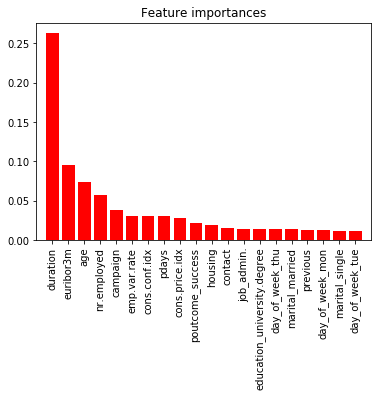

In [188]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

#### Duration признак оказался наиболее значительным

## Extremely Randomized Trees

In [191]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.10933333333333334
[[1295   33]
 [ 125   47]]


## AdaBoost

In [192]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.06742857142857143 0.09733333333333333
[[1295   33]
 [ 125   47]]


## GBT

In [193]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0014285714285714286 0.10666666666666667
[[1295   33]
 [ 125   47]]


## Выводы:
#### В таблице приведены результаты работы каждой из моделей. Происходит сравнение ошибок на тестовых и тренировочных данных. Достаточно хорошие результаты показали методы k-ближайших соседей и SVC с ошибками на тестовой выборке 0.097 и 0.095 соответственно.



| Алгоритм                               |      err_train      |       err_test      | 
|--------------------------------------- |:-------------------:|:-------------------:|
| kNN                                    |       0.0829        |        0.0967       | 
| SVC                                    |       0.082         |        0.095        | 
| Extremely Randomized Trees             |       0             |        0.092        |
| AdaBoost                               |      0.067          |       0.097         |
| GDB                                    |      0.001          |       0.106         |

# Лабораторная работа №2
## Обучение нейронной сети


In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Можно заметить, что данные в наборе несбалансированы, поэтому для построения более точной модели требуется провести балансировку

In [75]:
data['y'].value_counts()

no     6193
yes     807
Name: y, dtype: int64

In [78]:
g = data.groupby('y')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [79]:
bData = g['y']
bData.value_counts()

yes    807
no     807
Name: y, dtype: int64

### RESAMPLING

In [84]:
# Class count 0-no, 1-yes
count_class_0, count_class_1 = data['y'].value_counts()

# Divide by class
df_class_0 = data[data['y'] == 'no']
df_class_1 = data[data['y'] == 'yes']

### RANDOM UNDER SAMPLING

Random under-sampling:
yes    807
no     807
Name: y, dtype: int64


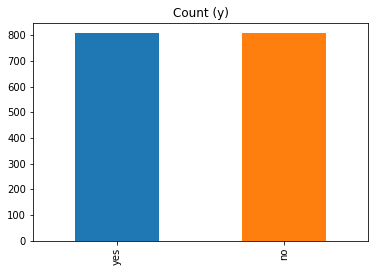

In [86]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (y)');

### RANDOM OVER SAMPLING

Random over-sampling:
yes    6193
no     6193
Name: y, dtype: int64


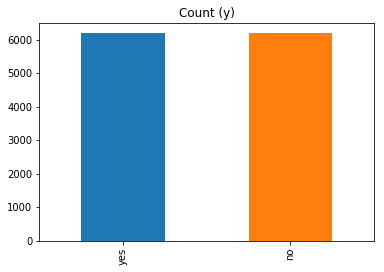

In [87]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Count (y)');

Таким образом метод Random Over Sampling сбалансировал данные, при этом в выборке осталось достаточное количество объектов для обучения модели

In [88]:
df_test_over.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default,housing,loan,contact,y
35577,-0.769971,-0.556485,-0.565915,0.195412,-0.34949,-1.197921,-1.179366,-1.231019,-1.370633,-0.94027,...,0,0,0,1,0,0,1,1,1,no
13950,-0.674013,-0.598910,-0.204906,0.195412,-0.34949,0.839050,0.591417,-0.474785,0.773566,0.84516,...,0,0,0,1,0,0,1,1,1,no
32295,-0.578055,-0.780182,-0.565915,0.195412,-0.34949,-1.197921,-1.179366,-1.231019,-1.330851,-0.94027,...,0,0,0,1,0,0,1,0,1,no
27477,1.245142,-0.953740,1.600139,0.195412,-0.34949,-0.115780,-0.648995,-0.323538,0.230453,0.39811,...,0,0,0,1,0,0,1,0,1,no
31507,0.573438,-0.120661,-0.204906,0.195412,-0.34949,-1.197921,-1.179366,-1.231019,-1.318743,-0.94027,...,0,1,0,1,0,0,0,1,1,no


In [89]:
# X Y для новой выборки

X = df_test_over.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = df_test_over['y'] # значение, которое предсказываем
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8670 3716


### Обучаем классификатор

In [91]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes - Количество нейронов на каждом скрытом слое  
solver - подбор весов ('lbfgs' is an optimizer in the family of quasi-Newton methods)  
activation - функция активации ('logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)))  



In [92]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
model_layers = mlp_model.n_layers_
print(model_layers)

3


### Проверяем классификатор

In [94]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [95]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0017301038062283738 0.041442411194833155


In [96]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.9982698961937716 0.9585575888051668


In [97]:
print(1 - mlp_model.score(X_test, y_test))

0.04144241119483316


### Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha

(Можно вместо циклов, написанных руками, использовать sklearn.model_selection.GridSearchCV и т.п.)

#### Подбор оптимального значения alpha

In [98]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

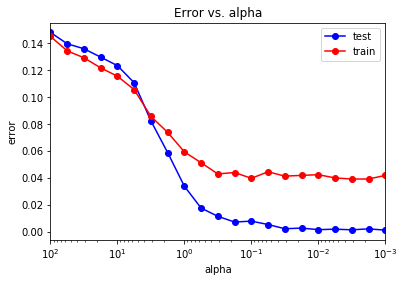

In [99]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass


In [100]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0010380622837370243 0.03902045209903122


In [101]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00177828 0.00316228]


In [102]:
alpha_opt = alpha_opt[0]

In [103]:
# sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs'], 'max_iter': [10,15,25,35,40,50], 
              'alpha': alpha_arr, 'activation': ['logistic'], 'random_state': [42], 'hidden_layer_sizes':(100,)}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)


c:\angelina\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8777393310265282
{'activation': 'logistic', 'alpha': 3.1622776601683795, 'hidden_layer_sizes': 100, 'max_iter': 50, 'random_state': 42, 'solver': 'lbfgs'}


In [104]:
print(f"Best error: {1-clf.score(X_train, y_train)}")

grid_search_alfa = clf.best_params_['alpha']
print(f"Best alpha: {grid_search_alfa}")
      


Best error: 0.12226066897347176
Best alpha: 3.1622776601683795


#### Подбор оптимального количества нейронов 

In [105]:
neurons_list = np.arange(2,40,2)
print(neurons_list)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]


In [106]:
test_err = []
train_err = []
for neuron in neurons_list:
    hidden_layer_sizes = (neuron,)
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

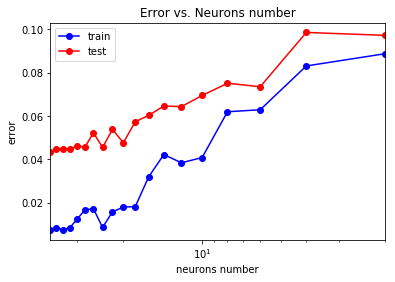

In [107]:
plt.semilogx(neurons_list, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_list, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_list), np.min(neurons_list)])
plt.title('Error vs. Neurons number')
plt.xlabel('neurons number')
plt.ylabel('error')
plt.legend()
pass

In [108]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.007381776239907728 0.04332615715823466


In [109]:
# Оптимальное количество нейронов
index = test_err.index(min_test_err)
neuron_num_opt = neurons_list[index]
print(neuron_num_opt)

38


### Классификатор при найденных оптимальных значениях:

Повторим обучение с найденными оптимальными параметрами:

1 скрытый слой

In [110]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_num_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.007381776239907728
0.04332615715823466


2 скрытых слоя

In [111]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_num_opt, neuron_num_opt),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.01764705882352941
0.04817007534983853


3 скрытых слоя

In [112]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_num_opt, neuron_num_opt, neuron_num_opt),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.04832756632064591
0.06189451022604951


### Матрица рассогласования:

In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1654   11]
 [ 219 1832]]


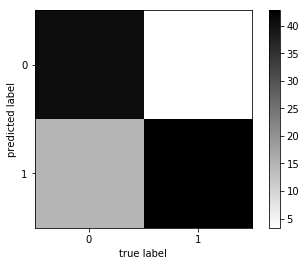

In [114]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass


### Другие метрики качества:

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          no       0.99      0.88      0.93      1873
         yes       0.89      0.99      0.94      1843

   micro avg       0.94      0.94      0.94      3716
   macro avg       0.94      0.94      0.94      3716
weighted avg       0.94      0.94      0.94      3716



### Выводы:

Балансировка данных помогла получить достаточно хорошие результаты при обучении модели.
Таким образом, была обучена неглубокая нейронная сеть, для которой подбирались оптимальные значения количества нейронов и alpha. Были также проведены эксперименты по добавлению скрытых слоев в модель. Лучшие показатели были достигнуты с двумя скрытыми слоями.

При несбалансированных данных:
Согласно полученным значениям precision, recall, f1-score, наблюдаем, что классификатор достаточно точно определяет класс "no", однако при этом имеет чуть больше 50% точности при принятии решения в пользу класса "yes". Это обусловлено несбалансированностью данных при обучении модели. 

Данные сбалансированы:
Удалось достигнуть ошибки в 0.04817007534983853 для тестовой выборки, что является лучшим показателем среди остальных алгоритмов. 



| Algorithm                              |      err_train      |       err_test      | 
|--------------------------------------- |:-------------------:|:-------------------:|
| kNN                                    |       0.0829        |        0.0967       | 
| SVC                                    |       0.082         |        0.095        | 
| Extremely Randomized Trees             |       0             |        0.092        |
| AdaBoost                               |      0.067          |       0.097         |
| GDB                                    |      0.001          |       0.106         |  
|**Neural network**                      |      **0.01764**    |       **0.04817**   |